In [2]:
import pandas as pd
from scipy.stats import ttest_ind
responses_df  = pd.read_csv('/content/response_final.csv')
llm_df = pd.read_csv('/content/llm_finals.csv')

In [3]:
df = pd.DataFrame(responses_df)
male_answers = df[df['Gender'] == 'Male']['Option']
female_answers = df[df['Gender'] == 'Female']['Option']

T-Test

In [4]:
t_stat, p_value = ttest_ind(male_answers, female_answers)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: nan
P-value: nan


In [5]:
df = df.sample(frac = 1)

In [6]:
x=df.head()
x

,Unnamed: 0,Age,Gender,Experience,Question,Option,Count
143,143,18-22 years old,Man,What is you preferred development environment?,What is you preferred development environment?,Windows,1
230,230,18-22 years old,Woman,How do you learn to code?,How do you learn to code?,"School (i.e, University, College, etc)",1
247,247,27-35 years old,Man,What is the biggest challenge you face as a de...,What is the biggest challenge you face as a de...,Work-life balance,1
110,110,23-26 years old,Woman,How do you communicate effectively with teamma...,How do you communicate effectively with teamma...,Use project management tools to assign tasks a...,1
80,80,23-26 years old,Man,How do you ensure that you stay up-to-date wit...,How do you ensure that you stay up-to-date wit...,Participate in online courses and certificatio...,1


In [7]:
response_list = x.to_dict('list')

In [8]:
response_list

{'Unnamed: 0': [143, 230, 247, 110, 80],
 'Age': ['18-22 years old',
  '18-22 years old',
  '27-35 years old',
  '23-26 years old',
  '23-26 years old'],
 'Gender': ['Man', 'Woman', 'Man', 'Woman', 'Man'],
 'Experience': ['What is you preferred development environment?',
  ' How do you learn to code?',
  'What is the biggest challenge you face as a developer?',
  'How do you communicate effectively with teammates to collaborate while adhering to the timelines?',
  'How do you ensure that you stay up-to-date with industry changes as a software developer?'],
 'Question': ['What is you preferred development environment?',
  ' How do you learn to code?',
  'What is the biggest challenge you face as a developer?',
  'How do you communicate effectively with teammates to collaborate while adhering to the timelines?',
  'How do you ensure that you stay up-to-date with industry changes as a software developer?'],
 'Option': ['Windows',
  'School (i.e, University, College, etc)',
  'Work-life ba

In [9]:
male_counts = df[df['Gender'] == 'Man']['Option']
female_counts = df[df['Gender'] == 'Woman']['Option']

t_statistic, p_value = ttest_ind(male_counts, female_counts)

In [10]:
print("T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-test results:
T-statistic: nan
P-value: nan


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt

data = responses_df.to_dict('list')

df = pd.DataFrame(data)

print(df.describe())

gender_counts = df['Gender'].value_counts()
age_counts = df['Age'].value_counts()
print(gender_counts)
print(age_counts)

gender_analysis = df.groupby('Gender')['Option'].value_counts().unstack().fillna(0)
print(gender_analysis)

age_analysis = df.groupby('Age')['Option'].value_counts().unstack().fillna(0)
print(age_analysis)

print("correlation_matrix")
correlation_matrix = df.corr()
print(correlation_matrix)

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Option']))
print("Chi-square test p-value:", p)

contingency_table = pd.crosstab(df['Gender'], df['Option'])
print("Contingency Table:")
print(contingency_table)

development_environment_by_age = df.groupby('Age')['Option'].value_counts().unstack().fillna(0)
print(development_environment_by_age)



In [12]:
import numpy as np
arrays = np.array(list(data.values()))

print(arrays)


[['0' '1' '2' ... '311' '312' '313']
 ['23-26 years old' '23-26 years old' '23-26 years old' ...
  '27-35 years old' '27-35 years old' '27-35 years old']
 ['Man' 'Man' 'Man' ... 'Woman' 'Woman' 'Woman']
 ...
 ['What is you preferred development environment?'
  ' How do you learn to code?' ' How do you learn to code?' ...
  "You're assigned to a project that requires expertise in a programming language you're not familiar with. The deadline is tight. What is your strategy to tackle this situation? "
  'You discover a critical bug right before a software release. What immediate action do you take?'
  'In a professional setting, if your team is supposed to deliver a SaaS product within a two-day timeframe, and you discover a critical bug in the software, how would you address and handle this situation?']
 ['Windows' 'Leetcode' 'School (i.e, University, College, etc)' ...
  'Use your existing knowledge and adapt as you go.'
  'Delay the release to assess and fix the bug, ensuring the produ

Fleiss_Kappa (Survey Response)

In [13]:
import numpy as np
from collections import defaultdict
from scipy.stats import f_oneway
responses=arrays
option_mapping = defaultdict(lambda: len(option_mapping))
for row in responses:
    for i, option in enumerate(row):
        option_mapping[option]

responses_numeric = np.array([[option_mapping[option] for option in row] for row in responses])

observed_agreement = np.mean(np.sum(responses_numeric == np.max(responses_numeric, axis=1, keepdims=True), axis=0) / responses_numeric.shape[0])

chance_agreement = np.mean(np.sum((responses_numeric == i)[:, np.newaxis] * np.sum(responses_numeric == i, axis=1, keepdims=True) / (responses_numeric.shape[1] ** 2) for i in range(len(option_mapping))))

fleiss_kappa = (observed_agreement - chance_agreement) / (1 - chance_agreement)

print("Observed Agreement:", observed_agreement)
print("Chance Agreement:", chance_agreement)
print("Fleiss' Kappa:", fleiss_kappa)

Observed Agreement: 0.10282074613284804
Chance Agreement: 0.00011234424416427859
Fleiss' Kappa: 0.10271994188291521


<ipython-input-13-0d82f62d4edf>:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  chance_agreement = np.mean(np.sum((responses_numeric == i)[:, np.newaxis] * np.sum(responses_numeric == i, axis=1, keepdims=True) / (responses_numeric.shape[1] ** 2) for i in range(len(option_mapping))))


Fleiss_Kappa (LLM Response)

In [14]:
import numpy as np
from collections import defaultdict
from scipy.stats import f_oneway

data = llm_df.to_dict('list')
responses=np.array(list(data.values()))
option_mapping = defaultdict(lambda: len(option_mapping))
for row in responses:
    for i, option in enumerate(row):
        option_mapping[option]

responses_numeric = np.array([[option_mapping[option] for option in row] for row in responses])

observed_agreement = np.mean(np.sum(responses_numeric == np.max(responses_numeric, axis=1, keepdims=True), axis=0) / responses_numeric.shape[0])

chance_agreement = np.mean(np.sum((responses_numeric == i)[:, np.newaxis] * np.sum(responses_numeric == i, axis=1, keepdims=True) / (responses_numeric.shape[1] ** 2) for i in range(len(option_mapping))))

fleiss_kappa = (observed_agreement - chance_agreement) / (1 - chance_agreement)

print("Observed Agreement:", observed_agreement)
print("Chance Agreement:", chance_agreement)
print("Fleiss' Kappa:", fleiss_kappa)

Observed Agreement: 0.24134871339840283
Chance Agreement: 0.00010227845541526622
Fleiss' Kappa: 0.2412711117796367


<ipython-input-14-182c062268e9>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  chance_agreement = np.mean(np.sum((responses_numeric == i)[:, np.newaxis] * np.sum(responses_numeric == i, axis=1, keepdims=True) / (responses_numeric.shape[1] ** 2) for i in range(len(option_mapping))))


Chi-squared for Response doc, To Test: Coorelation between age/gender and their option selection

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import f_oneway

data = responses_df.to_dict('list')
df = pd.DataFrame(data)
contingency_table = pd.crosstab(index=[df['Age'], df['Gender']], columns=df['Option'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 246.65147868562184
p-value: 0.9997998942937268
Degrees of freedom: 330


Chi-squared for LLM doc, To Test: Coorelation between age/gender and their option selection

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import f_oneway

data = llm_df.to_dict('list')
df = pd.DataFrame(data)
contingency_table = pd.crosstab(index=[df['Age'], df['Gender']], columns=df['Option'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 112.77068260822102
p-value: 0.9780172715792257
Degrees of freedom: 145


Chi-squared for Response survey, To Test: Coorelation between Experince and their option selection

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import f_oneway

data = responses_df.to_dict('list')
df = pd.DataFrame(data)
contingency_table = pd.crosstab(index=[df['Experience']], columns=df['Option'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 3443.0
p-value: 0.0
Degrees of freedom: 726


Chi-squared for LLM survey, To Test: Coorelation between Experince and their option selection

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import f_oneway

data = llm_df.to_dict('list')
df = pd.DataFrame(data)
contingency_table = pd.crosstab(index=[df['Experience']], columns=df['Option'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 43.59447007395121
p-value: 0.9198980018161055
Degrees of freedom: 58


In [28]:
llm_df = llm_df.sample(frac = 1)
x= llm_df.head()

In [ ]:
x_list=x.to_dict('list')
x_list

Logistic Regression

In [39]:
import statsmodels.api as sm
def logistic_regression(data, dependent_var, independent_vars):
    X = sm.add_constant(data[independent_vars])
    y = data[dependent_var]
    model = sm.Logit(y, X)
    result = model.fit()
    return result
logit_result = logistic_regression(pd.concat([responses_df, llm_df]), 'Option', ['Question', 'Age', 'Gender', 'Experience'])
print("\nLogistic regression summary:")
print(logit_result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Clustering

In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

df_survey_1 = responses_df
df_survey_2 = llm_df

combined_categories = df_survey_1['Experience'].append(df_survey_2['Experience']).unique().reshape(-1, 1)
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

encoded_survey_1 = encoder.fit_transform(df_survey_1[['Age', 'Gender', 'Experience']])
encoded_survey_2 = encoder.transform(df_survey_2[['Age', 'Gender', 'Experience']])
df_encoded_survey_1 = pd.concat([df_survey_1[['Option']], pd.DataFrame(encoded_survey_1)], axis=1)
df_encoded_survey_2 = pd.concat([df_survey_2[['Option']], pd.DataFrame(encoded_survey_2)], axis=1)
kmeans_1 = KMeans(n_clusters=3, random_state=42)
kmeans_2 = KMeans(n_clusters=3, random_state=42)
clusters_survey_1 = kmeans_1.fit_predict(df_encoded_survey_1.iloc[:, 1:])
clusters_survey_2 = kmeans_2.fit_predict(df_encoded_survey_2.iloc[:, 1:])
df_survey_1['Cluster'] = clusters_survey_1
df_survey_2['Cluster'] = clusters_survey_2

print("Clustered Survey 1:")
print(df_survey_1)
print("\nClustered Survey 2:")
print(df_survey_2)

<ipython-input-44-92a556704f4f>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_categories = df_survey_1['Experience'].append(df_survey_2['Experience']).unique().reshape(-1, 1)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

Clustered Survey 1:
     Unnamed: 0              Age Gender  \
0             0  23-26 years old    Man   
1             1  23-26 years old    Man   
2             2  23-26 years old    Man   
3             3  23-26 years old    Man   
4             4  23-26 years old    Man   
..          ...              ...    ...   
309         309  27-35 years old  Woman   
310         310  27-35 years old  Woman   
311         311  27-35 years old  Woman   
312         312  27-35 years old  Woman   
313         313  27-35 years old  Woman   

                                            Experience  \
0       What is you preferred development environment?   
1                            How do you learn to code?   
2                            How do you learn to code?   
3                            How do you learn to code?   
4                            How do you learn to code?   
..                                                 ...   
309  Software development contributes to societal c...   

Cluster Distribution

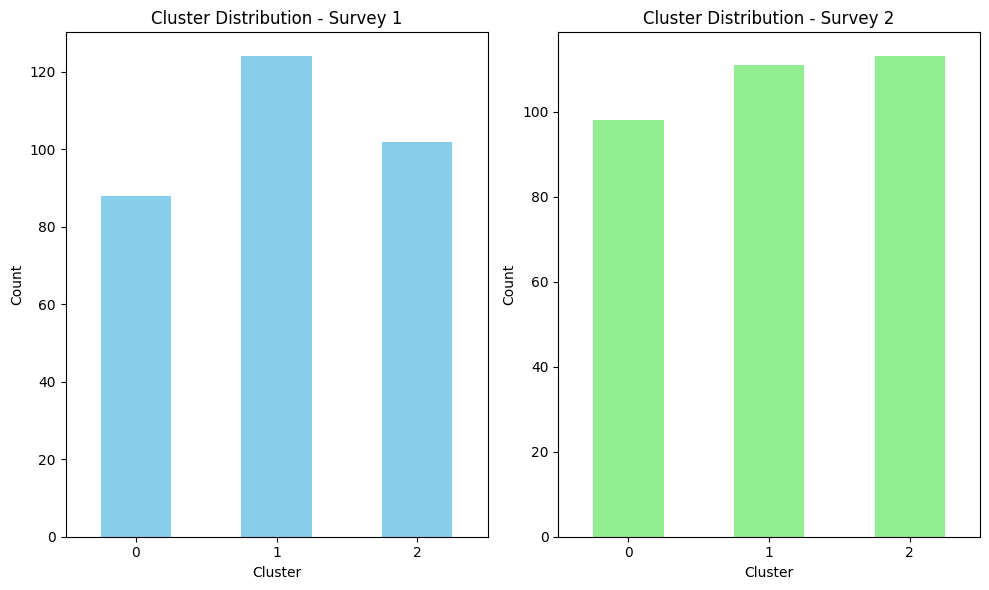

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df_survey_1['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution - Survey 1')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.subplot(1, 2, 2)
df_survey_2['Cluster'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Cluster Distribution - Survey 2')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

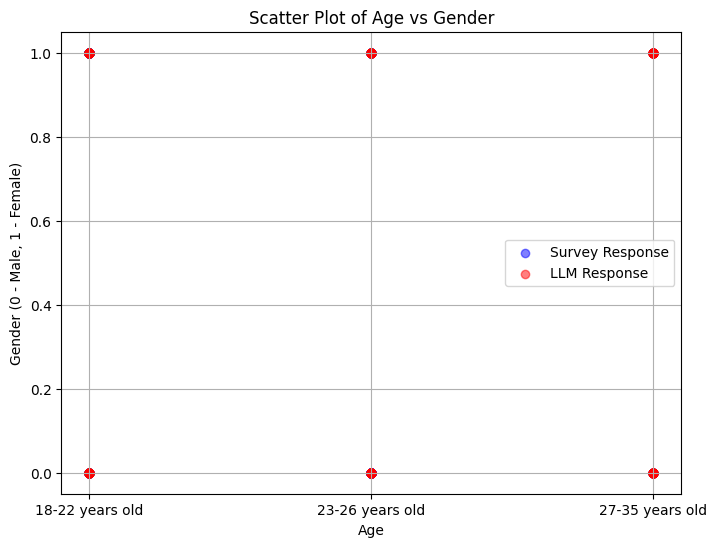

In [48]:
import matplotlib.pyplot as plt
survey_response = responses_df.to_dict('list')
llm_response = llm_df.to_dict('list')
age_categories = ['18-22 years old', '23-26 years old', '27-35 years old']
age_mapping = {'18-22 years old': 1, '23-26 years old': 2, '27-35 years old': 3}
gender_mapping = {'Man': 0, 'Woman': 1}
survey_age = [age_mapping[age] for age in survey_response['Age']]
survey_gender = [gender_mapping[gender] for gender in survey_response['Gender']]
llm_age = [age_mapping[age] for age in llm_response['Age']]
llm_gender = [gender_mapping[gender] for gender in llm_response['Gender']]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(survey_age, survey_gender, color='blue', label='Survey Response', alpha=0.5)
plt.scatter(llm_age, llm_gender, color='red', label='LLM Response', alpha=0.5)

plt.title('Scatter Plot of Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender (0 - Male, 1 - Female)')
plt.xticks(range(1, len(age_categories) + 1), age_categories)
plt.legend()

plt.grid(True)
plt.show()


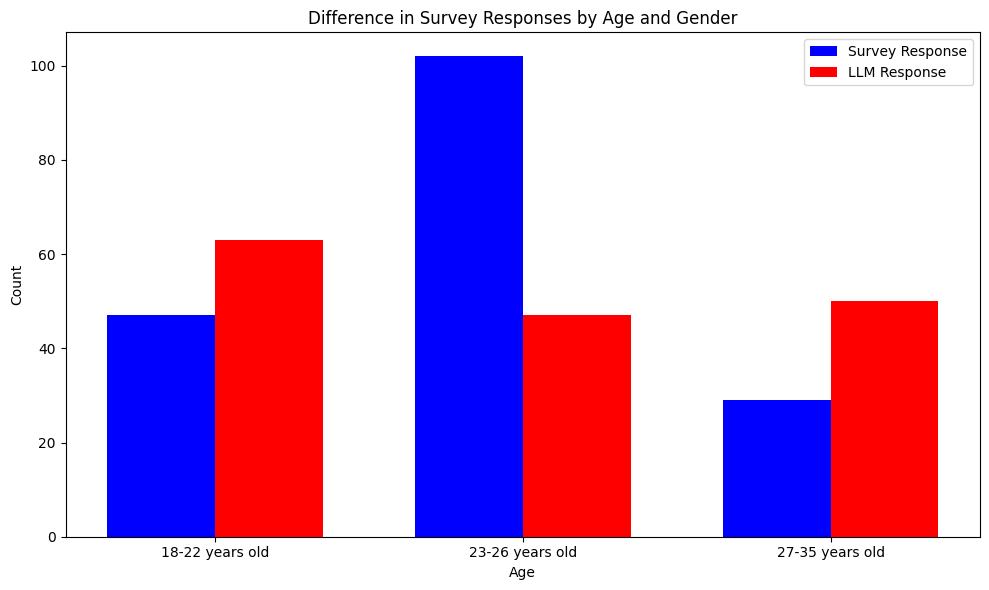

In [60]:
age_categories = ['18-22 years old', '23-26 years old', '27-35 years old']
age_mapping = {'18-22 years old': 0, '23-26 years old': 1, '27-35 years old': 2}
gender_mapping = {'Man': 0, 'Woman': 1}
survey_age_gender = [(age_mapping[survey_response['Age'][i]], gender_mapping[survey_response['Gender'][i]]) for i in range(len(survey_response['Age']))]
llm_age_gender = [(age_mapping[llm_response['Age'][i]], gender_mapping[llm_response['Gender'][i]]) for i in range(len(llm_response['Age']))]
survey_counts = np.zeros((len(age_categories), 2), dtype=int)
llm_counts = np.zeros((len(age_categories), 2), dtype=int)

for age, gender in survey_age_gender:
    survey_counts[age, gender] += 1

for age, gender in llm_age_gender:
    llm_counts[age, gender] += 1

# bar graph
bar_width = 0.35
index = np.arange(len(age_categories))

fig, ax = plt.subplots(figsize=(10, 6))
survey_bars = ax.bar(index - bar_width/2, survey_counts[:,0], bar_width, label='Survey Response', color='blue')
llm_bars = ax.bar(index + bar_width/2, llm_counts[:,0], bar_width, label='LLM Response', color='red')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Difference in Survey Responses by Age and Gender')
ax.set_xticks(index)
ax.set_xticklabels(age_categories)
ax.legend()
plt.tight_layout()
plt.show()

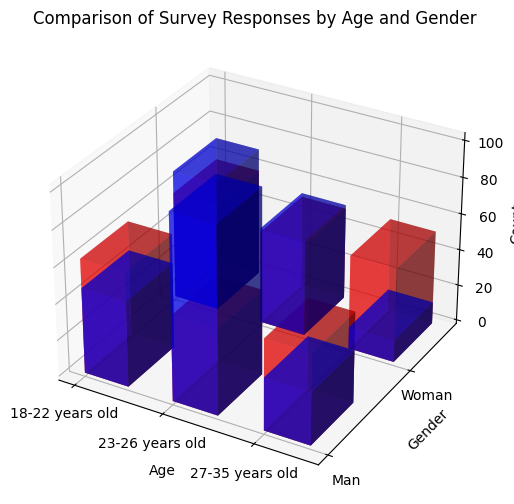

In [51]:
age_categories = ['18-22 years old', '23-26 years old', '27-35 years old']
age_mapping = {'18-22 years old': 0, '23-26 years old': 1, '27-35 years old': 2}
gender_mapping = {'Man': 0, 'Woman': 1}
survey_age_gender = [(age_mapping[survey_response['Age'][i]], gender_mapping[survey_response['Gender'][i]]) for i in range(len(survey_response['Age']))]
llm_age_gender = [(age_mapping[llm_response['Age'][i]], gender_mapping[llm_response['Gender'][i]]) for i in range(len(llm_response['Age']))]
survey_counts = np.zeros((len(age_categories), 2), dtype=int)
llm_counts = np.zeros((len(age_categories), 2), dtype=int)

for age, gender in survey_age_gender:
    survey_counts[age, gender] += 1

for age, gender in llm_age_gender:
    llm_counts[age, gender] += 1
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = np.repeat(np.arange(len(age_categories)), 2)
y = np.tile(np.arange(2), len(age_categories))
z1 = np.zeros_like(x)
z2 = np.zeros_like(x)

dx = dy = 0.5
dz1 = survey_counts.flatten()
dz2 = llm_counts.flatten()

ax.bar3d(x, y, z1, dx, dy, dz1, color='b', zsort='average', alpha=0.5, label='Survey Response')
ax.bar3d(x, y, z2, dx, dy, dz2, color='r', zsort='average', alpha=0.5, label='LLM Response')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Count')
ax.set_xticks(np.arange(len(age_categories)))
ax.set_xticklabels(age_categories)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Man', 'Woman'])
ax.set_title('Comparison of Survey Responses by Age and Gender')

# Show plot
plt.show()

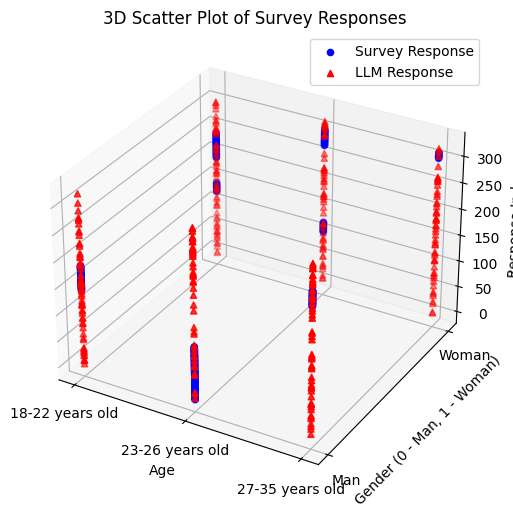

In [52]:
age_mapping = {'18-22 years old': 0, '23-26 years old': 1, '27-35 years old': 2}
gender_mapping = {'Man': 0, 'Woman': 1}
survey_age = [age_mapping[age] for age in survey_response['Age']]
survey_gender = [gender_mapping[gender] for gender in survey_response['Gender']]

llm_age = [age_mapping[age] for age in llm_response['Age']]
llm_gender = [gender_mapping[gender] for gender in llm_response['Gender']]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(survey_age, survey_gender, range(len(survey_age)), c='b', marker='o', label='Survey Response')
ax.scatter(llm_age, llm_gender, range(len(llm_age)), c='r', marker='^', label='LLM Response')
ax.set_xlabel('Age')
ax.set_ylabel('Gender (0 - Man, 1 - Woman)')
ax.set_zlabel('Response Index')
ax.set_xticks(range(len(age_mapping)))
ax.set_xticklabels(age_mapping.keys())
ax.set_yticks([0, 1])
ax.set_yticklabels(['Man', 'Woman'])
ax.set_title('3D Scatter Plot of Survey Responses')
ax.legend()
plt.show()

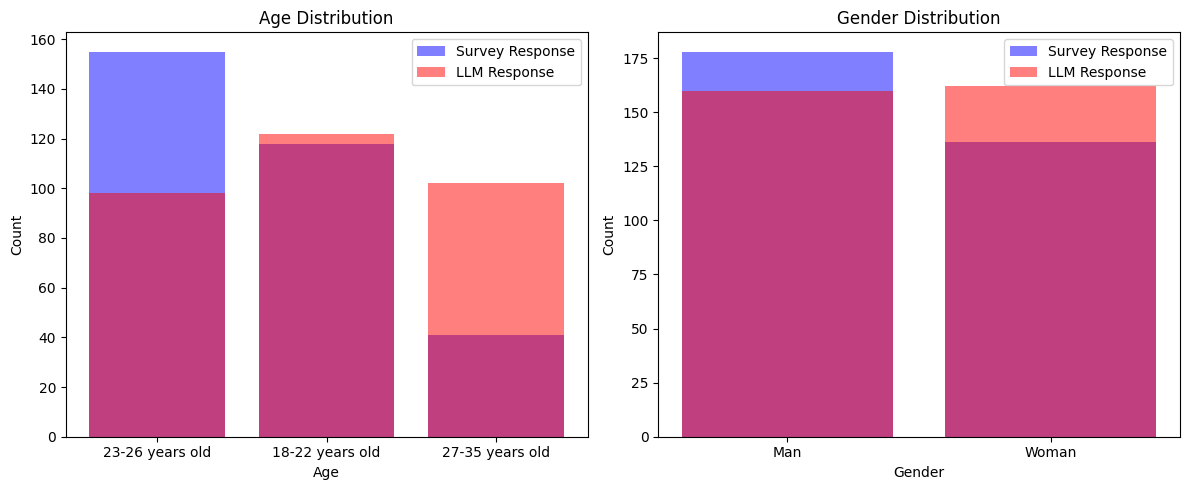

<ipython-input-53-18f2b070e778>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


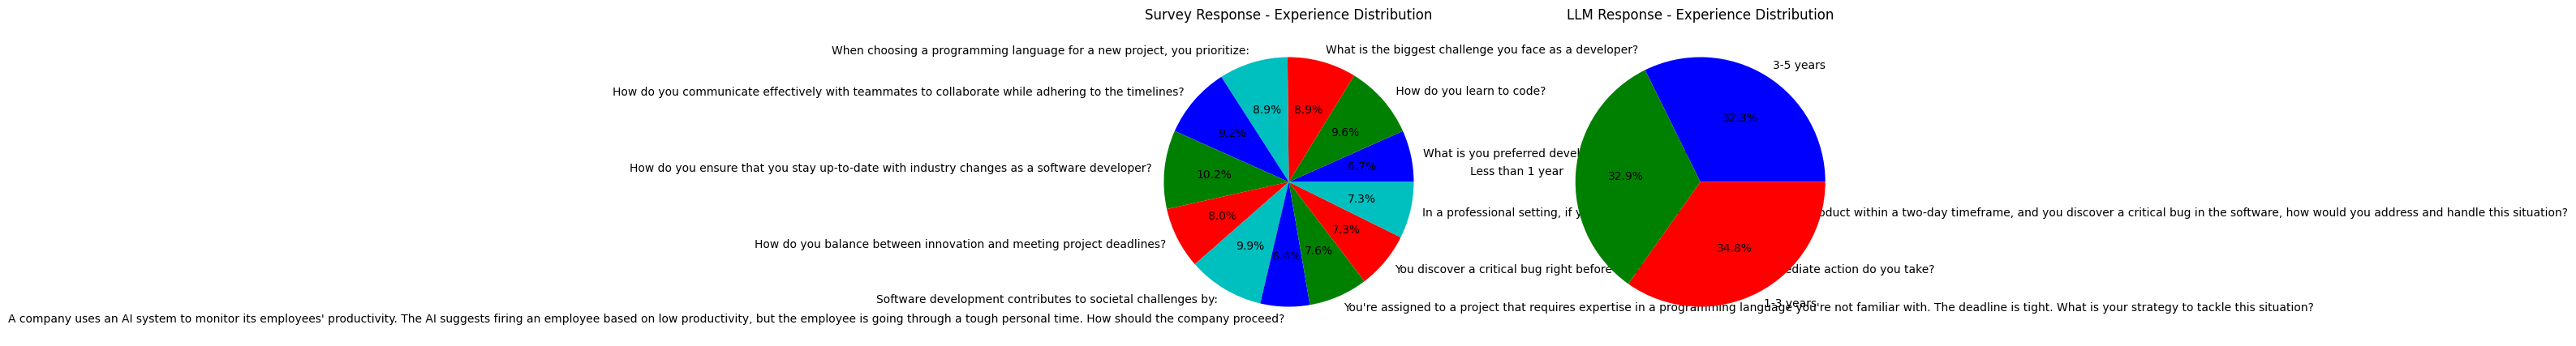

<ipython-input-53-18f2b070e778>:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


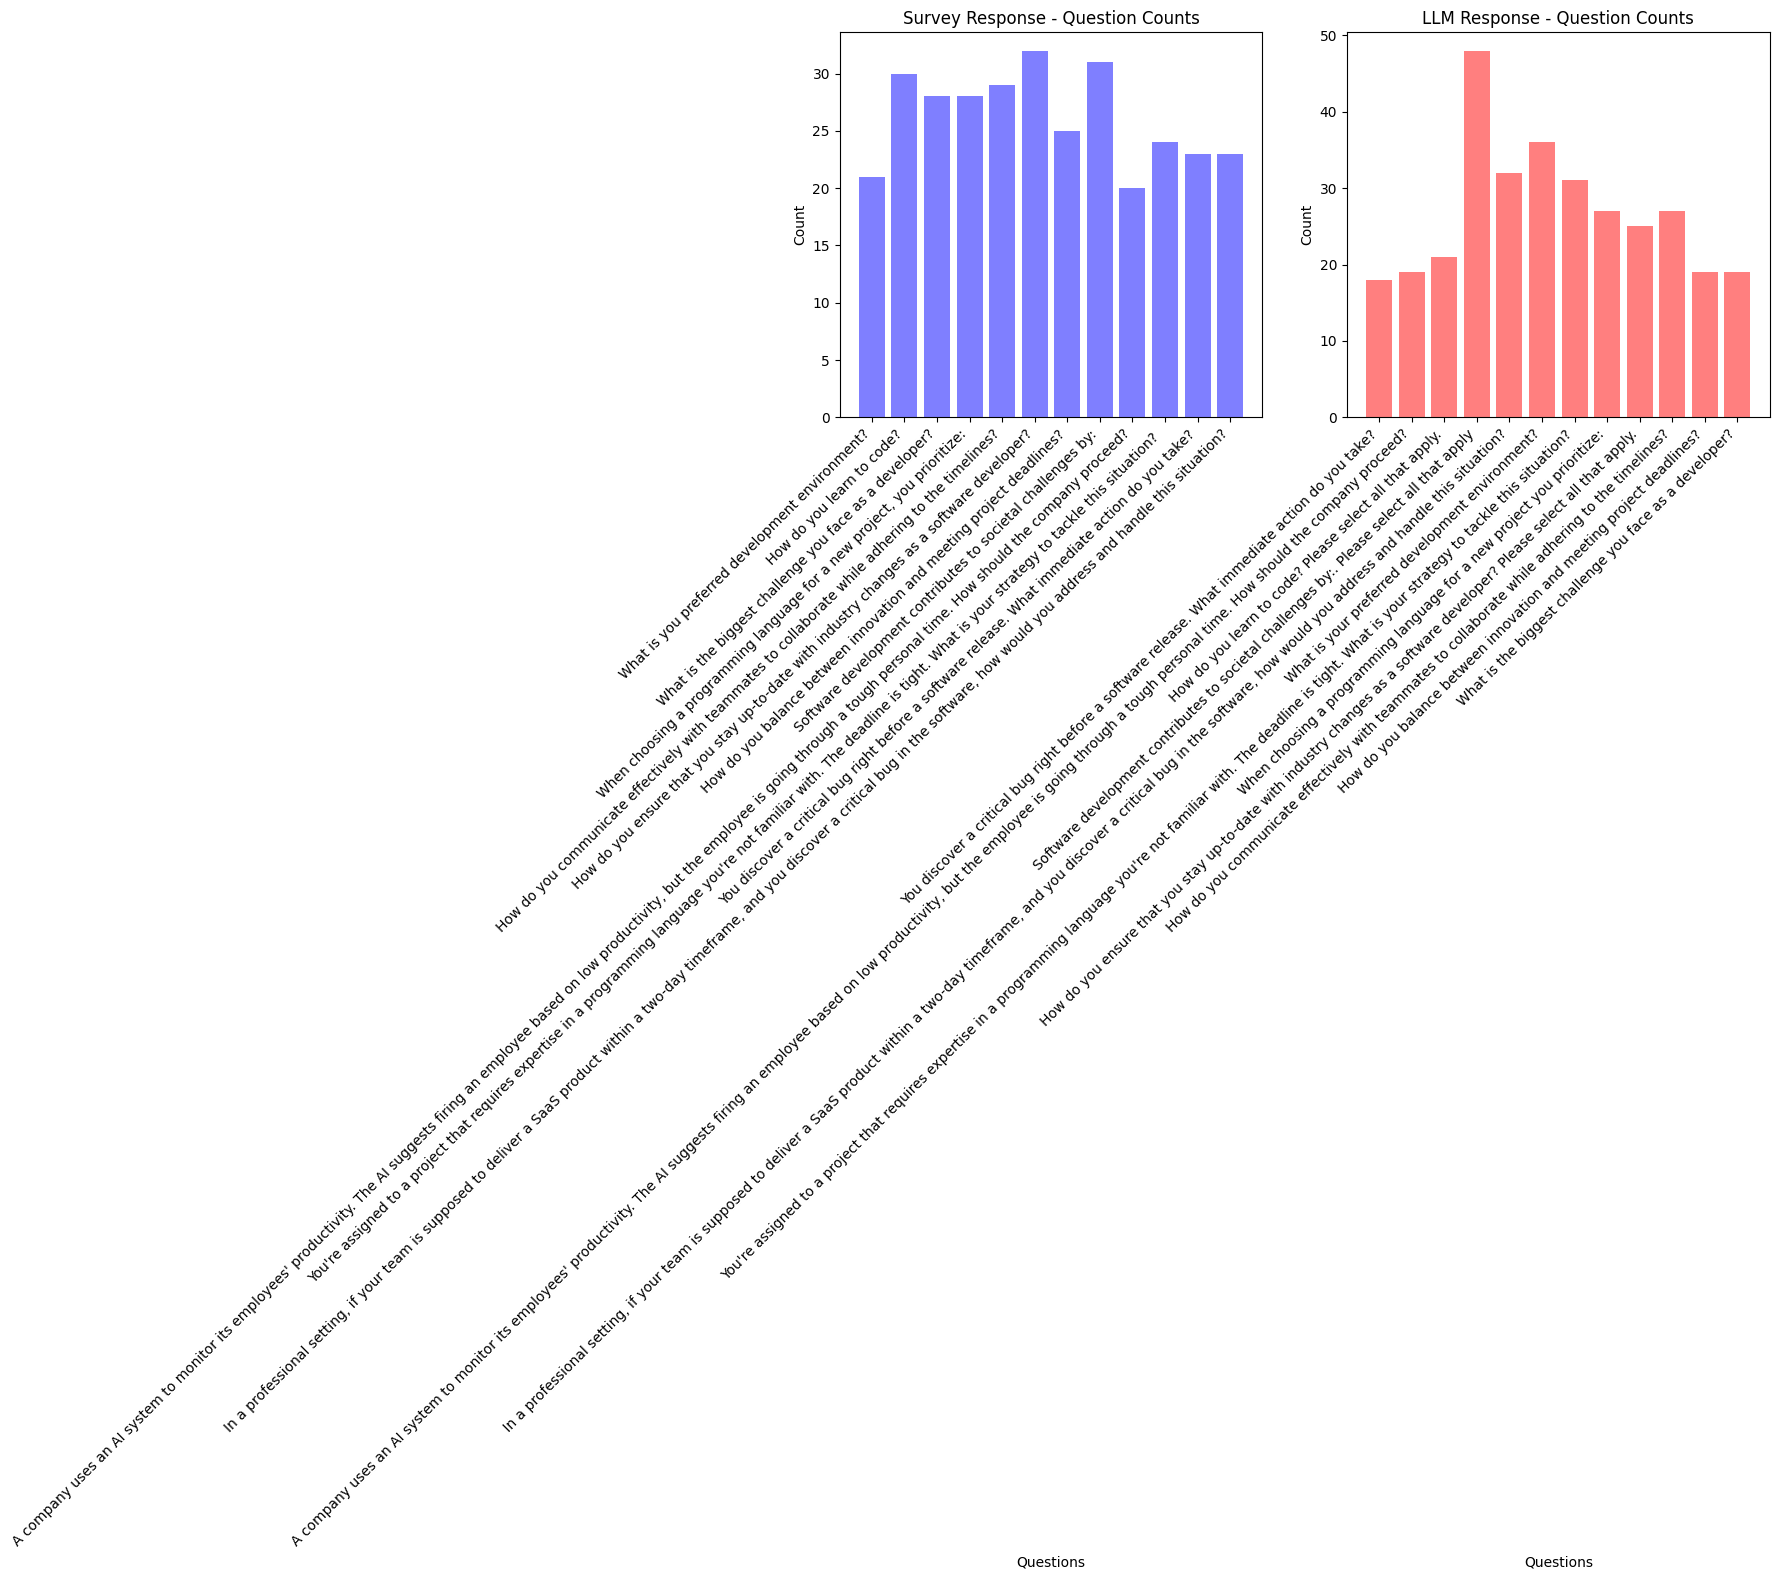

In [53]:
def count_occurrences(lst):
    counts = {}
    for item in lst:
        counts[item] = counts.get(item, 0) + 1
    return counts
survey_age_counts = count_occurrences(survey_response['Age'])
llm_age_counts = count_occurrences(llm_response['Age'])

survey_gender_counts = count_occurrences(survey_response['Gender'])
llm_gender_counts = count_occurrences(llm_response['Gender'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(survey_age_counts.keys(), survey_age_counts.values(), color='b', alpha=0.5, label='Survey Response')
plt.bar(llm_age_counts.keys(), llm_age_counts.values(), color='r', alpha=0.5, label='LLM Response')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(survey_gender_counts.keys(), survey_gender_counts.values(), color='b', alpha=0.5, label='Survey Response')
plt.bar(llm_gender_counts.keys(), llm_gender_counts.values(), color='r', alpha=0.5, label='LLM Response')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Pie Chart for Experience Distribution
survey_exp_counts = count_occurrences(survey_response['Experience'])
llm_exp_counts = count_occurrences(llm_response['Experience'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(survey_exp_counts.values(), labels=survey_exp_counts.keys(), autopct='%1.1f%%', colors=['b', 'g', 'r', 'c'])
plt.title('Survey Response - Experience Distribution')

plt.subplot(1, 2, 2)
plt.pie(llm_exp_counts.values(), labels=llm_exp_counts.keys(), autopct='%1.1f%%', colors=['b', 'g', 'r', 'c'])
plt.title('LLM Response - Experience Distribution')
plt.tight_layout()
plt.show()

# 3. Histogram for Response Counts
survey_question_counts = count_occurrences(survey_response['Question'])
llm_question_counts = count_occurrences(llm_response['Question'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(survey_question_counts.keys(), survey_question_counts.values(), color='b', alpha=0.5, label='Survey Response')
plt.xlabel('Questions')
plt.ylabel('Count')
plt.title('Survey Response - Question Counts')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(llm_question_counts.keys(), llm_question_counts.values(), color='r', alpha=0.5, label='LLM Response')
plt.xlabel('Questions')
plt.ylabel('Count')
plt.title('LLM Response - Question Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

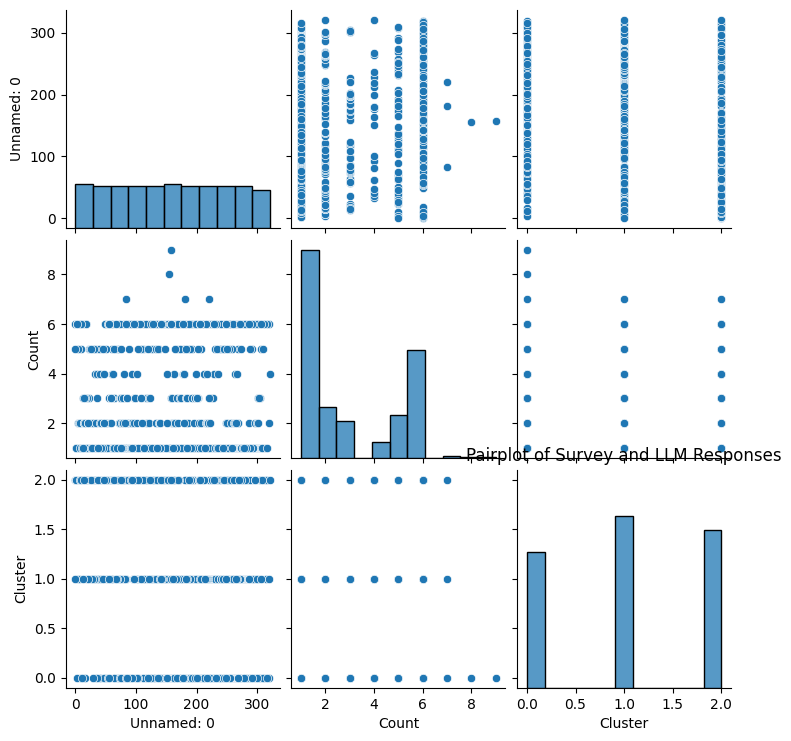

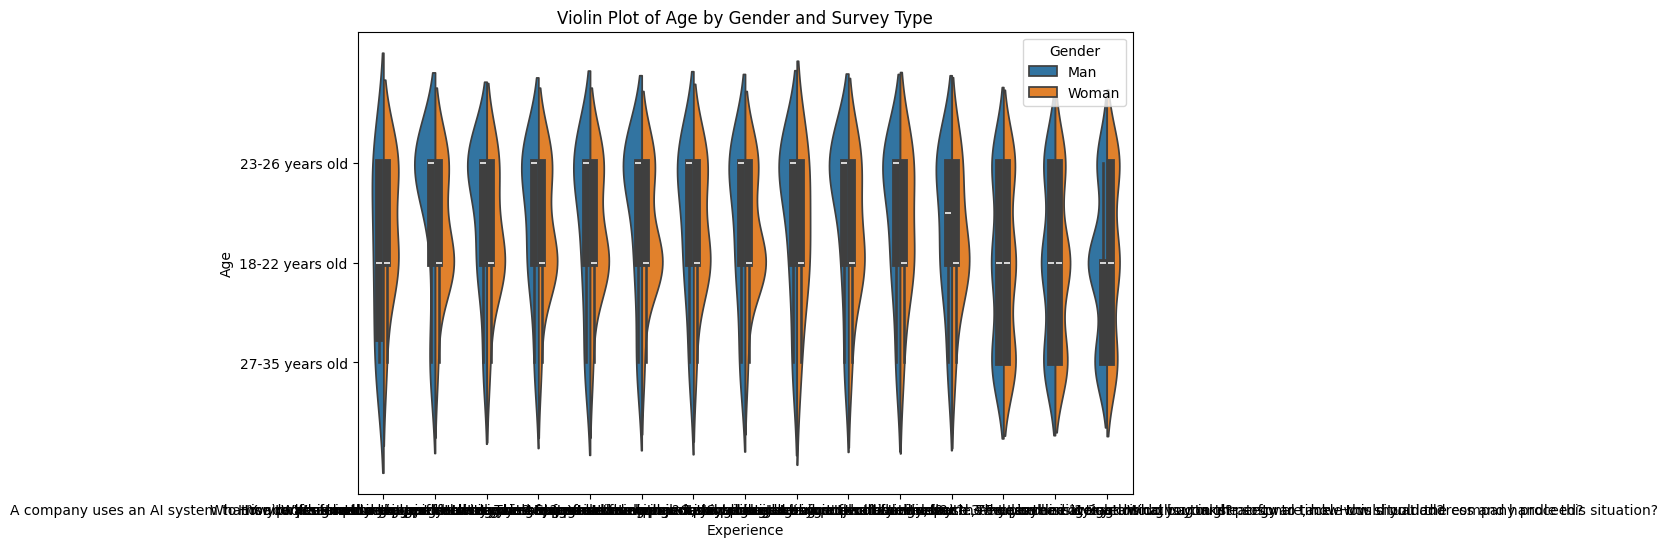

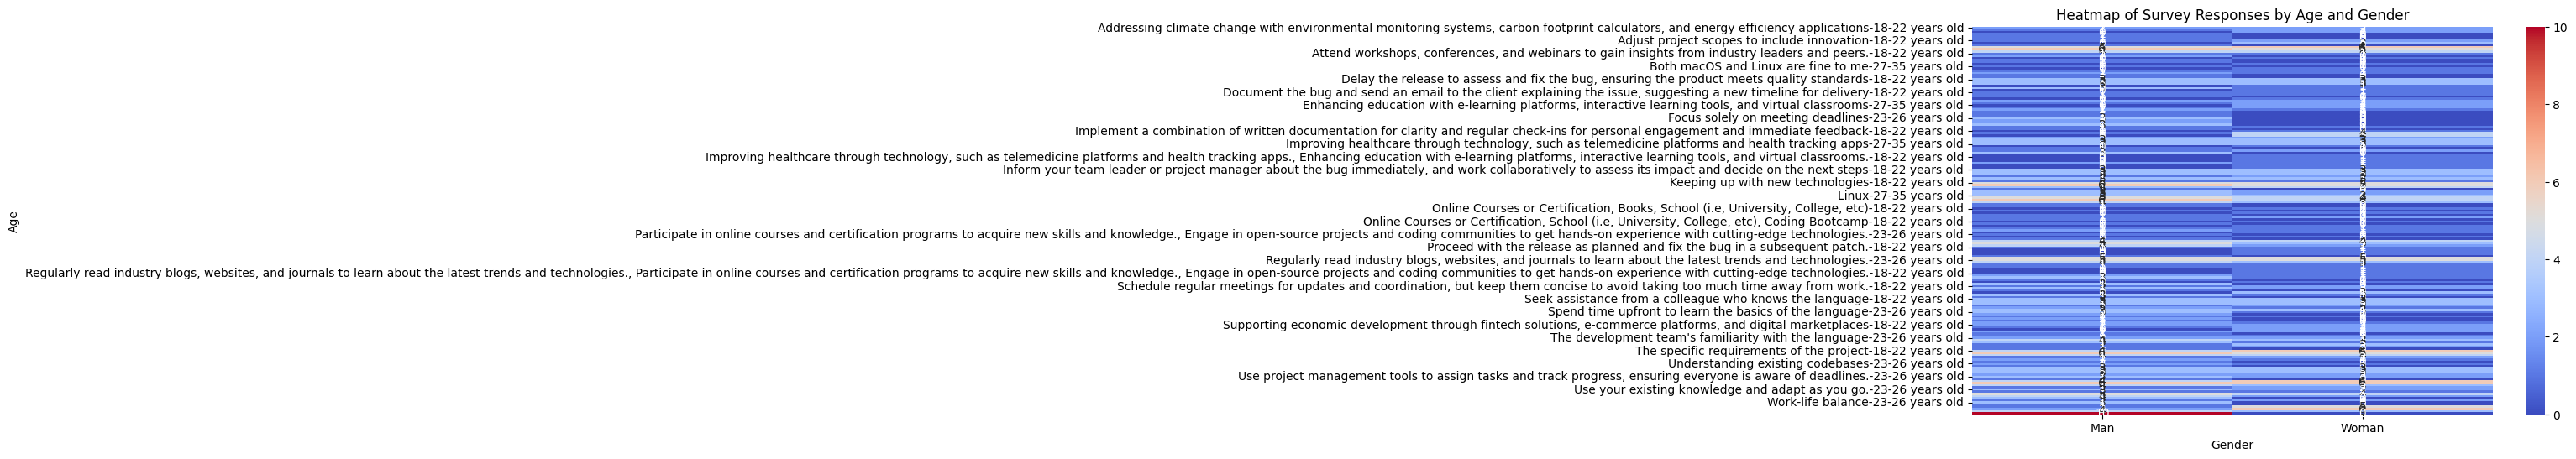

ValueError: 
    Invalid value of type 'builtins.range' received for the 'z' property of scatter3d
        Received value: range(0, 322)

    The 'z' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [58]:
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
survey_df = responses_df
combined_df = pd.concat([survey_df, llm_df], keys=['Survey', 'LLM'])
sns.pairplot(combined_df)
plt.title('Pairplot of Survey and LLM Responses')
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_df, x='Experience', y='Age', hue='Gender', split=True)
plt.title('Violin Plot of Age by Gender and Survey Type')
plt.show()
plt.figure(figsize=(10, 6))
heatmap_data = combined_df.groupby(['Option', 'Age', 'Gender']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Survey Responses by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=llm_df['Age'], y=llm_df['Gender'], z=range(len(llm_df)),
                           mode='markers', marker=dict(color='red'), name='LLM Response'))
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Gender', zaxis_title='Response Index'),
                  title='3D Scatter Plot of Survey Responses', showlegend=True)

# Show plot
fig.show()
